#### Autor: Bernardo Salinas Jaquez
#### Fecha: 6-Diciembre-2020
#### Árboles de clasificación. Datos históricos de pacientes y sus medicamentos

### Objetivo
Aplicar el algoritmo de árboles de clasificación para clasificar el medicamento de los pacientes de acuerdo a sus datos históricos.

### Descripcíon
Se utilza mediante comandos e instrucciones de Python y un conjunto de datos sobre los datos históricos de pacientes y sus medicamentos el algoritmo de regresión árboles de clasificación para clasificar cual es el medicamento o en este caso como lo denomina el conjunto de datos "Drug" que el paciente debe tomar de acuerdo a su historial médico.

### Fundamento teórico

Un árbol de clasificación es un conjunto de
condiciones organizadas en una estructura jerárquica,
de tal manera que la decisión final a tomar se puede
determinar siguiendo las condiciones que se cumplen
desde el nodo raíz hasta alguna de sus hojas. [Larrañaga, Desconocido]

Los algoritmos de clasificación se usan cuando el resultado deseado es un valor discreto en otras palabras son útiles cuando la respuesta al problema cae dentro de un conjunto finito de resultados posibles.

#### 1. Cargar librerías

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from sklearn.metrics import classification_report
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#### 2. Cargar datos

* Mostrar los primeros cinco registros
* Mostrar los ultimos cinco registros

In [2]:
datos = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv", delimiter=",")
datos.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
datos.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


#### 3. Descripción de los datos

La llamada Drug es la etiqueta o variable dependiente tipo discreta que tiene los diferentes medicamentos que son cosumidos por los pacientes entre ellos están drugA, drugB, drugC, drugX, drugY

Las variables independientes son:
* Age - Representa la edad del paciente
* Sex - Representa el sexo del paciente F Mujer M Hombre
* BP - Representa la presión de la sangre LOW, NORMAL, HIGH
* Cholesterol - Colesterol en la sangre del paciente NORMAL, HIGH
* Na_to_K - Proporción entre sodio y potasio en la sangre



In [4]:
datos.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
print(datos.groupby('Drug').size())

Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
dtype: int64


#### 4. Limpieza de los datos
Algunos de los datos son de tipo categoría como por ejemplo Sex y Cholesterol y el algoritmo árboles de clasificación no soporta datos categoricos por esa razón hay que volverlos númericos

Primero dividimos los datos de una vez separando en dos conjuntos en donde uno solo contiene las variables independientes y otro que solo contiene la variable dependiente

In [6]:
X = np.array(datos.drop(['Drug'],1))
Y = np.array(datos['Drug'])
X.shape

(200, 5)

Ahora si a convertir los datos categoricos a númericos

In [7]:
numeric_sex = preprocessing.LabelEncoder()
numeric_sex.fit(['F','M'])
X[:,1] = numeric_sex.transform(X[:,1]) 

numeric_BP = preprocessing.LabelEncoder()
numeric_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = numeric_BP.transform(X[:,2])

numeric_Chol = preprocessing.LabelEncoder()
numeric_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = numeric_Chol.transform(X[:,3]) 

In [8]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Como vemos ya los datos todos son los datos son númericos quedando de la siguiente manera:

* Sex - F 0 M 1
* BP - LOW 0, NORMAL 1, HIGH 2
* Cholesterol - NORMAL 0, HIGH 1

#### 5. Datos de entrenamiento y validación

Separar los datos con un 80% de entrenamiento y 20% de validación y usando una semilla con valor 7

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

#### 6. Creación del modelo

Se crea el modelo de árbol con una profundidad de 4 niveles y para poder hacer sus predicciones el modelo usa entropía.

In [10]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### Predicciones

In [12]:
predicciones = drugTree.predict(X_test)

dataframePred = pd.DataFrame({"Valor actual":y_test, "Predicciones":predicciones})

dataframePred

,Valor actual,Predicciones
0,drugX,drugX
1,drugY,drugY
2,drugY,drugY
3,drugY,drugY
4,drugC,drugC
5,drugC,drugC
6,drugY,drugY
7,drugY,drugY
8,drugA,drugA
9,drugX,drugX


#### 7. Evaluación del modelo

In [13]:
print("Precisión del árbol: ", metrics.accuracy_score(y_test, predicciones))


Precisión del árbol:  0.95


##### Reporte de clasificación

In [14]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.83      0.91         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.88      0.93         8
       drugY       0.95      1.00      0.97        18

    accuracy                           0.95        40
   macro avg       0.95      0.94      0.94        40
weighted avg       0.96      0.95      0.95        40



##### Visualización del árbol

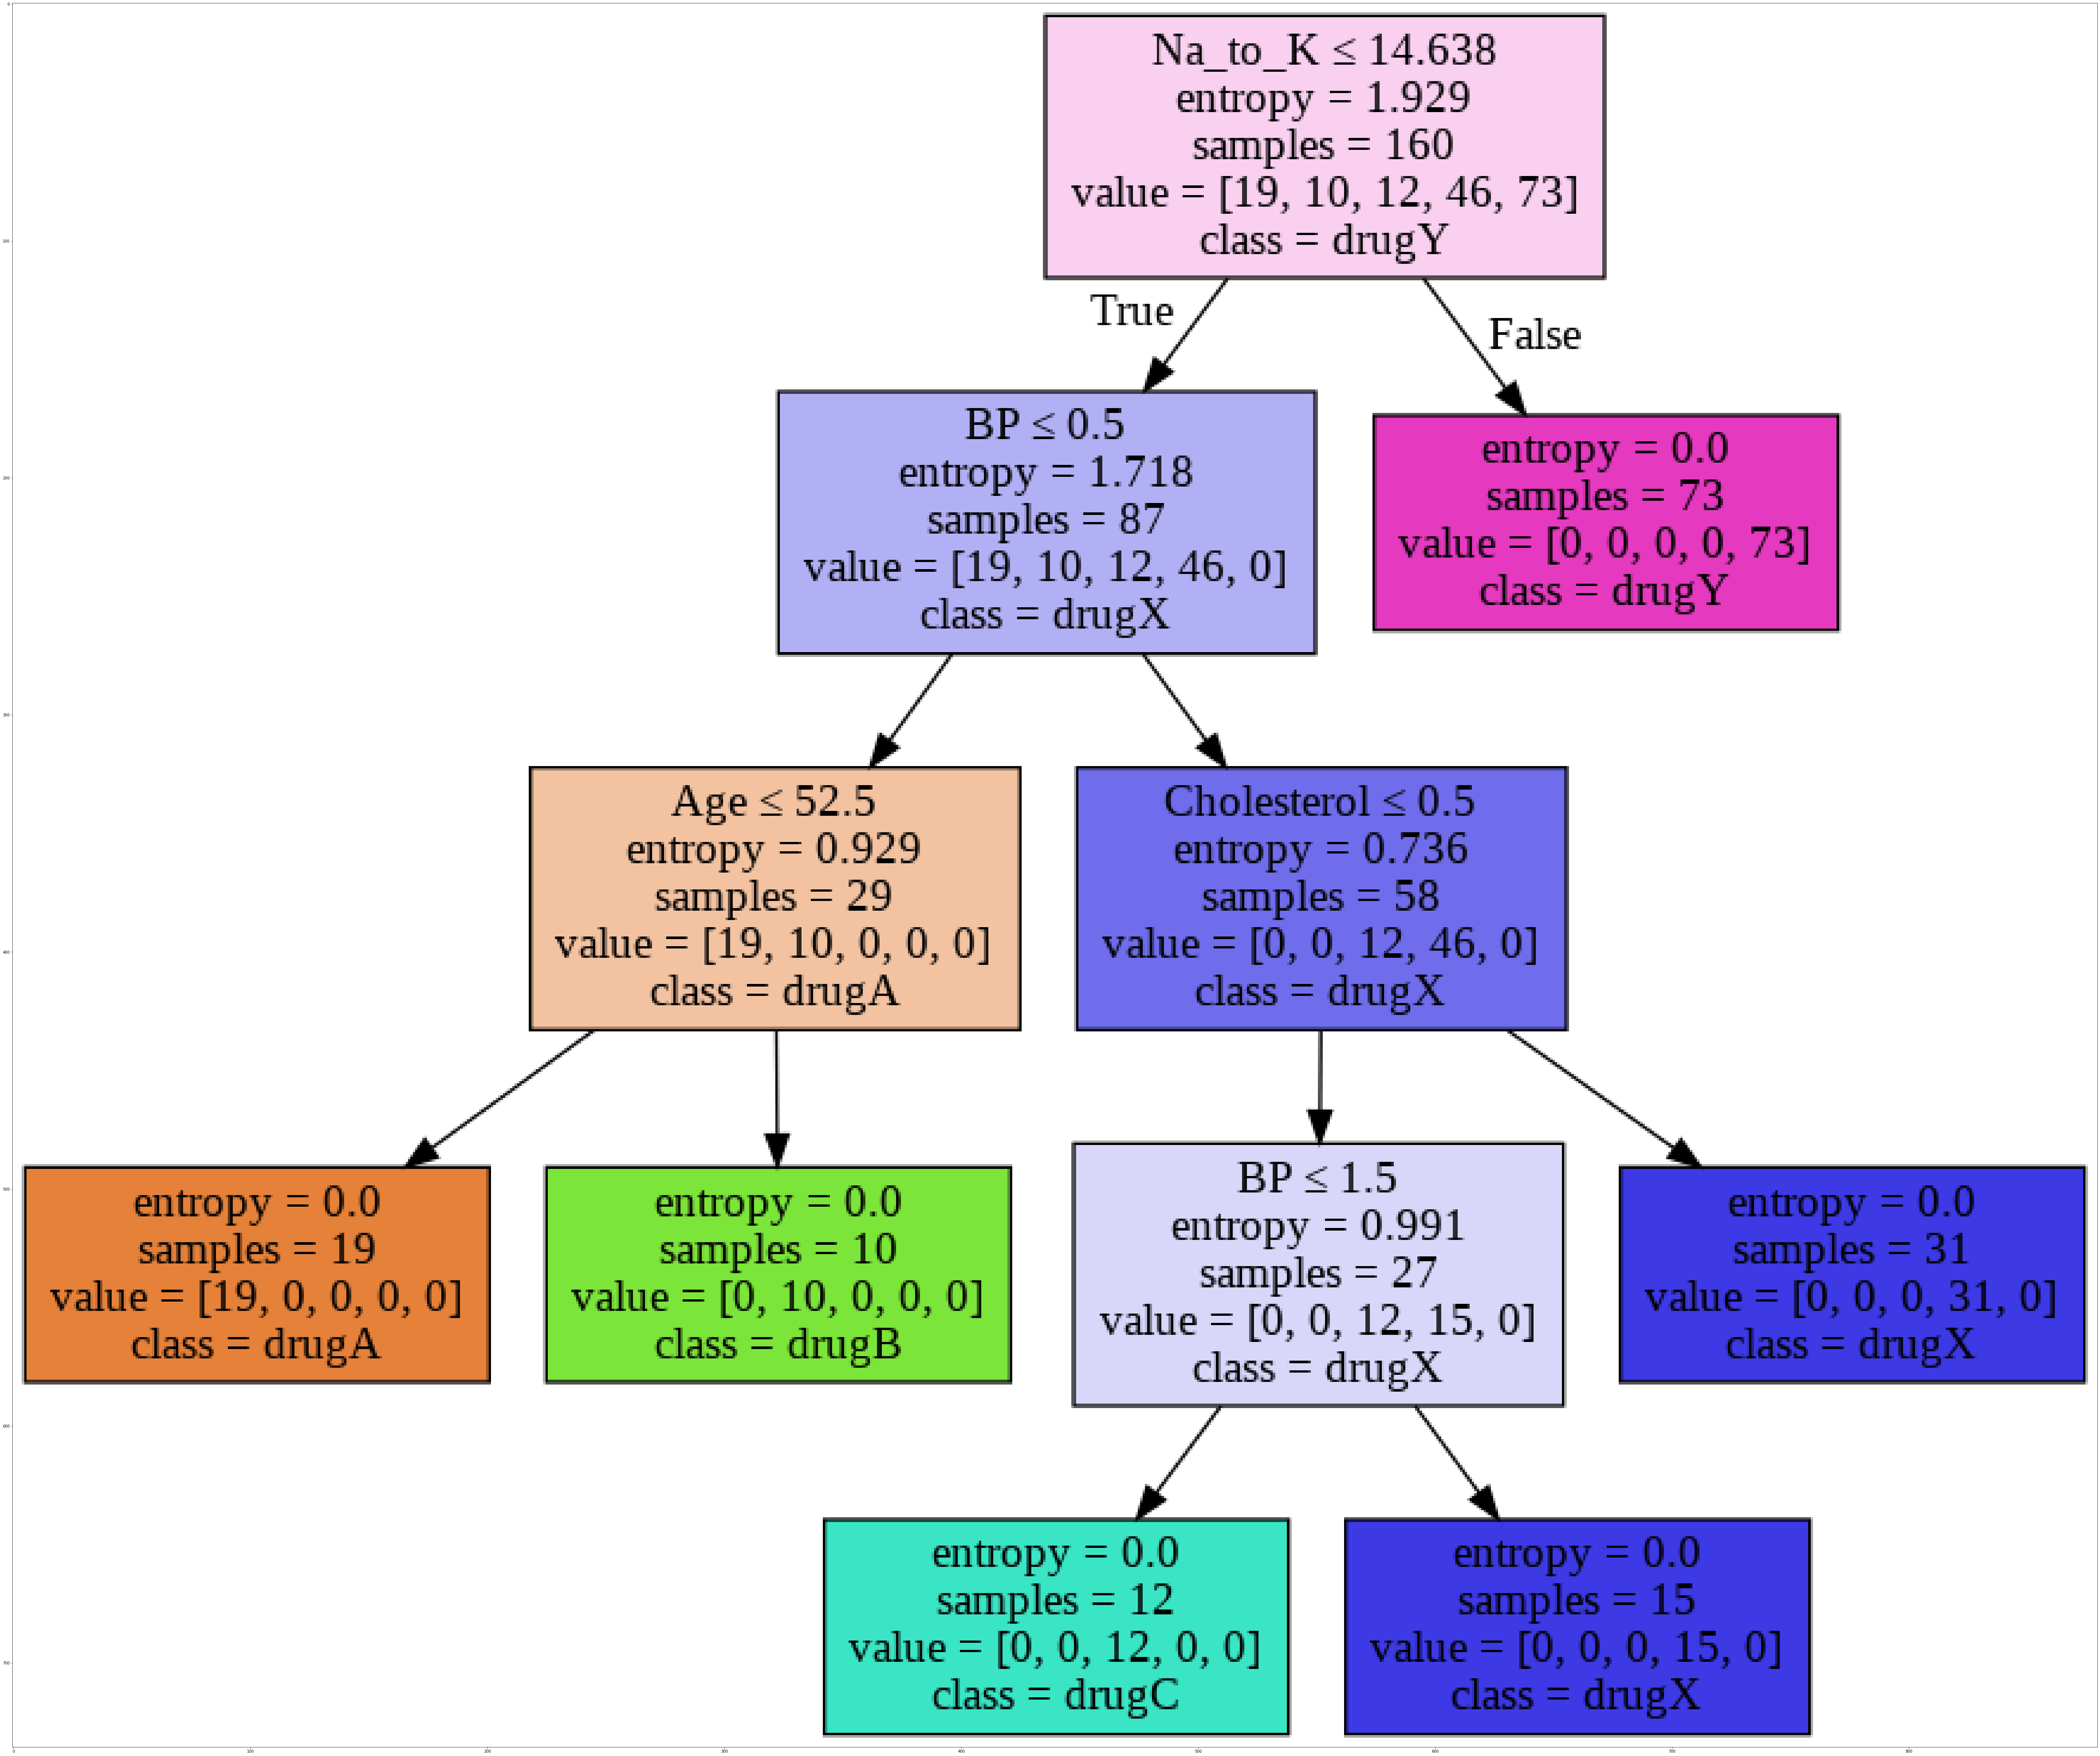

In [15]:
dot_data = StringIO()

filename = "drugtree.png"

featureNames = datos.columns[0:5]
targetNames = datos["Drug"].unique().tolist()

out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png(filename)

img = mpimg.imread(filename)

plt.figure(figsize=(100, 200))

plt.imshow(img,interpolation='nearest')


Este árbol nos quiere decir lo siguiente:
Empezando por la raiz se determina que el atributo más relevante es el NA_to_K:
* Si este es mayor de 14.638 este modelo determina que la droga ideal es drugY (termina su recorrido)

En el primer nivel del árbol donde avanza si es que el NA_to_K es menor o igual a 14.638 toma mucho en cuenta la presión de la sangre
* Si este dato es menor o igual que 0.5 este pasa al siguiente nivel tomando en cuenta la edad y en caso contrario donde la presión de la sangre es mayor que 0.5 toma en cuenta el colesterol

En el segundo nivel
* Si toma en cuenta la edad valora evalua si esta es menor o igual que 52.5

  * En caso de ser así el modelo asigna drugA como droga ideal (termina su recorrido)
  * En caso contrario el modelo asigna drugB como droga ideal (termina su recorrido)

En el tercer nivel
* Si toma en cuenta el colesterol evalua si este es menor o igual que 0.5

  * Si esto es correcto continua el modelo evaluando la presión de la sangre
  * En caso contrario el modelo determina que drugX es la droga ideal (termina su recorrido)

En el cuarto nivel
* Si toma en cuenta el colesterol evalua si este es menor a 1.5

  * Si se cumple asigna que drugC es la ideal (termina su recorrido)
  * En caso contrario asigna que drugX es la ideal (termina su recorrido)

#### 8. Interpretación

En este caso en donde se utiliza un conjunto de datos sobre los datos históricos de pacientes y sus medicamentos se decidió usar el modelo de árboles de clasificación para el conjunto de datos la variable objetivo que se utilizo fue Drug la cual indica el medicamento ideal para el paciente y las variables independientes fueron

* Age - Representa la edad del paciente
* Sex - Representa el sexo del paciente F Mujer M Hombre
* BP - Representa la presión de la sangre LOW, NORMAL, HIGH
* Cholesterol - Colesterol en la sangre del paciente NORMAL, HIGH
* Na_to_K - Proporción entre sodio y potasio en la sangre


El modelo entrenado fue un árbol que usa principalmente entropía para predecir los datos y usa una profundidad de 4 niveles, llegando a obtener en las predicciones realizadas una precisión del 95%. Y basándonos en el reporte de clasificación el modelo al predecir el tipo de medicamento en casi todos los tipos de medicamento obtiene una precisión del 100% siendo únicamente la excepción drugA y drugY ya que en estos obtuvo un 80% y un 95% de precisión respectivamente.
De esta manera llegando a concluir que el modelo de árboles de clasificación entrenado para este caso es muy bueno.
En cuanto al árbol de manera gráfica se encontró que:
Para la raíz es importante el valor de NA_to_K
Para el primer nivel es relevante:

* BP

Para el segundo nivel es relevante:

* 	Age 
*	Cholesterol

Para el tercer nivel es relevante:

*	BP

En el cuarto nivel se obtienen las conclusiones finales y la única variable que el modelo no toma en cuenta como relevante es Sex.


#### 9. Bibliografía

Información del caso

* http://www.sc.ehu.es/ccwbayes/docencia/mmcc/docs/t8s-arboles

Origen del caso

* https://www.statdeveloper.com/arboles-de-decision-en-python/
* https://dataplatform.cloud.ibm.com/docs/content/wsj/streaming-pipelines/SPSS_Model.html